In [58]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import json
from pprint import pprint

import glob
import os

In [127]:
## Loads a camhd_motion_analysis
def load_json( filename ):
    with open(filename) as data_file:
        d = json.load(data_file)
        d = pd.DataFrame.from_records(d["stats"], columns=[ 'frameNum','mean','stdDev'] )
        d['movie'] = os.path.splitext(os.path.basename(filename))[0]
        d = d.set_index( ['movie','frameNum'] )
    
    return d
    



In [135]:
merged = None

for filename in glob.iglob('../data/ursine/*.json'):
        print("Loading ", filename)
        d = load_json( filename )
        
        if merged is None:
            merged = d
        else:
            merged = merged.append(d)
            
            
basenames = merged.index.get_level_values(0).unique()
pprint(merged)

Loading  ../data/ursine/CAMHDA301-20160901T000000Z.json
Loading  ../data/ursine/CAMHDA301-20160901T030000Z.json
Loading  ../data/ursine/CAMHDA301-20160901T060000Z.json
Loading  ../data/ursine/CAMHDA301-20160901T090000Z.json
                                           mean     stdDev
movie                      frameNum                       
CAMHDA301-20160901T000000Z 1           0.000000   0.000000
                           100         0.000000   0.000000
                           200         0.000000   0.000000
                           300         0.000000   0.000000
                           400         0.000000   0.000000
                           500         0.000000   0.000000
                           600        94.128392  59.684877
                           700       101.782806  42.875392
                           800       101.722654  42.969711
                           900        95.161263  59.016329
                           1000       86.327518  63.438448
         

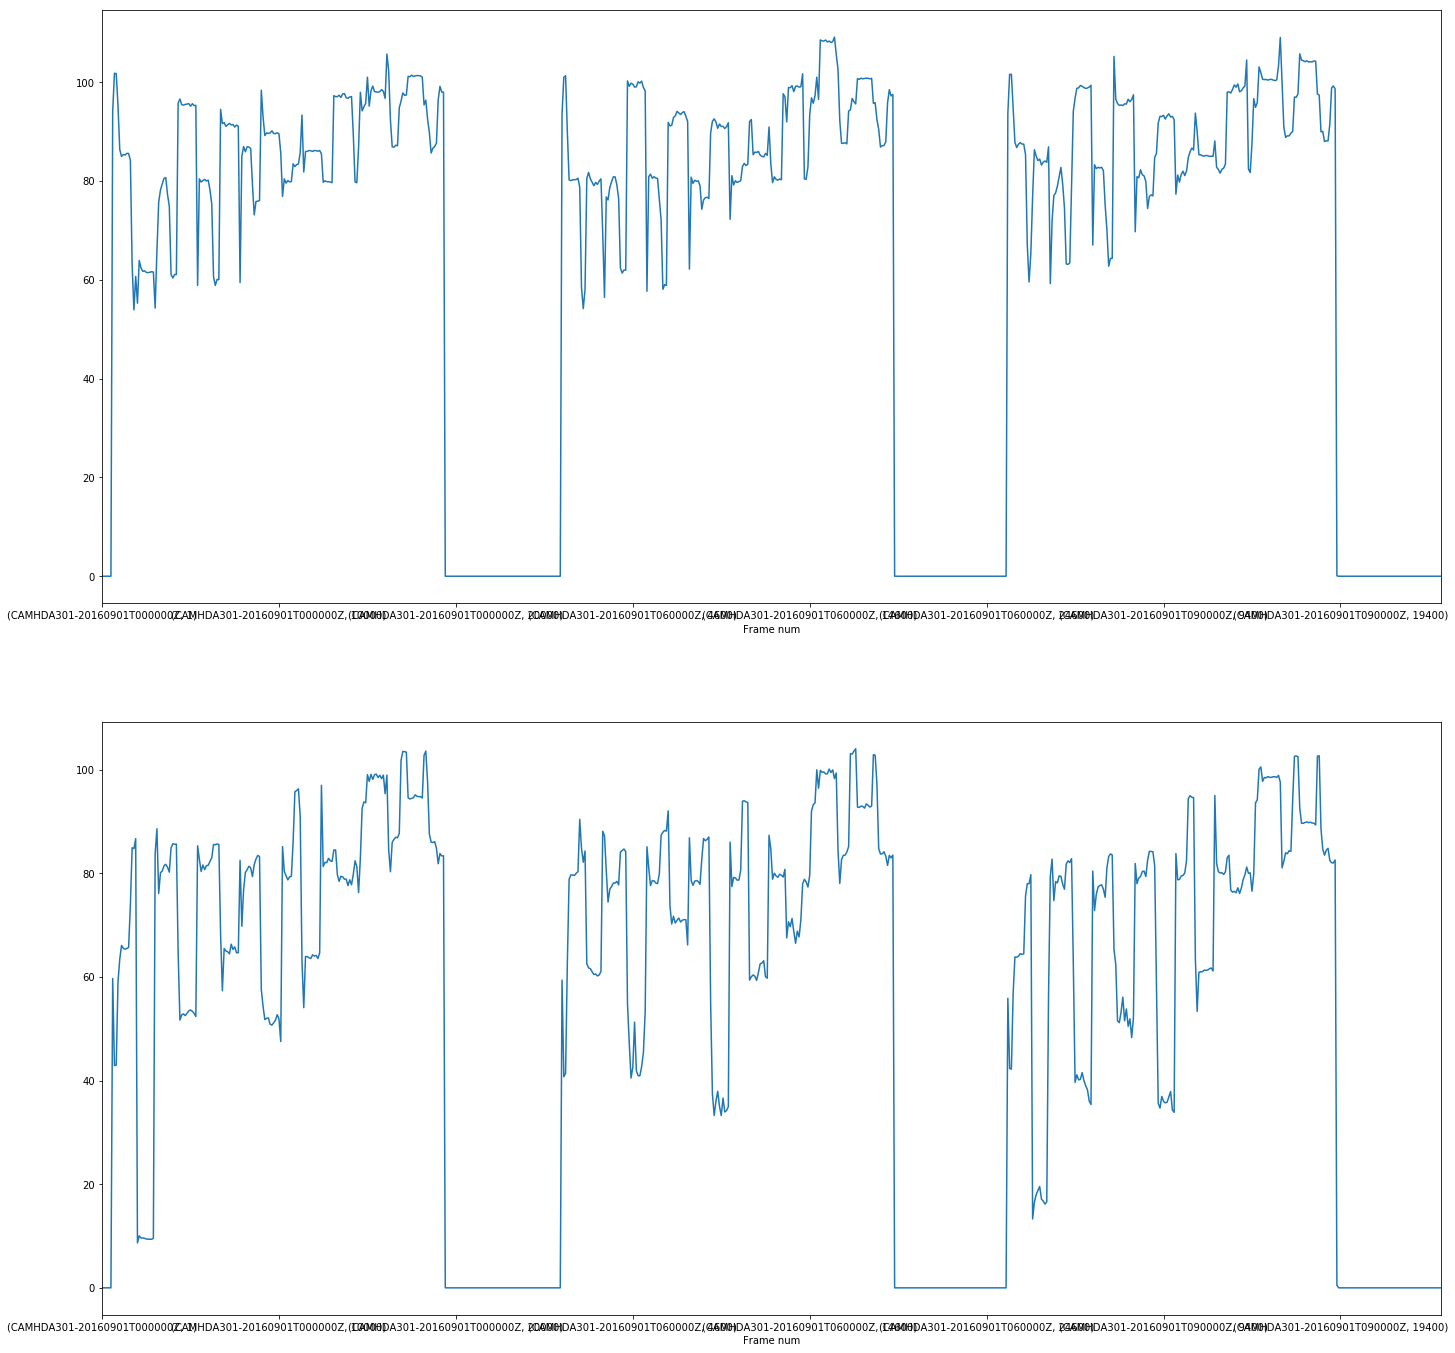

In [149]:
plt.figure( figsize=(24,24))

plt.subplot(211)
ts = merged['mean'].plot()

plt.xlabel('Frame num')
plt.ylabel('')
#plt.legend(['Mean', 'StdDev'])

plt.subplot(212)
ts = merged['stdDev'].plot()

plt.xlabel('Frame num')
# plt.ylabel('')

